In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('data/IoT Network Intrusion Dataset.csv')

In [3]:
x=[0,1,3,6,85]
df.drop(df.columns[x],  axis=1, inplace=True)
#df=df.fillna(0)

In [4]:
df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [5]:
df.fillna(0)

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,56112,8043,17,277,1,1,18.0,18.0,18.0,18.0,...,0.0,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai
625779,4570,554,6,1658,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS
625780,52739,9020,6,77,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan
625781,9020,49784,6,240,2,1,2776.0,1388.0,1388.0,1388.0,...,0.0,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal


In [6]:

numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [8]:
df.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,0.501137,0.499448,0.567468,0.499847,0.436222,0.298602,0.391086,0.470133,0.390515,0.389783,...,0.390201,0.0,0.035816,0.011422,0.035794,0.035812,0.500659,0.275628,0.499887,0.499282
std,0.288416,0.285936,0.330585,0.288509,0.351799,0.395936,0.383181,0.327340,0.381915,0.382053,...,0.379588,0.0,0.184116,0.105947,0.184000,0.184091,0.288686,0.396521,0.289114,0.288832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280781,0.309309,0.322322,0.248248,0.000000,0.000000,0.000000,0.251251,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.250751,0.000000,0.263764,0.240240
50%,0.503504,0.472973,0.322322,0.501001,0.535536,0.000000,0.527528,0.501502,0.502002,0.512012,...,0.614114,0.0,0.000000,0.000000,0.000000,0.000000,0.500501,0.000000,0.499499,0.495495
75%,0.786787,0.681181,1.000000,0.749750,0.790791,0.778779,0.751752,0.776777,0.765766,0.748921,...,0.614114,0.0,0.000000,0.000000,0.000000,0.000000,0.751251,0.749249,0.750250,0.748749
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [10]:
df.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,127.789841,127.359200,144.704425,127.461013,111.236664,76.143595,99.726875,119.884042,99.581277,99.394555,...,99.501152,0.0,9.133197,2.912661,9.127399,9.132055,127.668122,70.285207,127.471249,127.316850
std,73.545995,72.913756,84.299104,73.569861,89.708645,100.963674,97.711063,83.471751,97.388386,97.423550,...,96.794947,0.0,46.949657,27.016581,46.920053,46.943277,73.615024,101.112865,73.724040,73.652053
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.599099,78.873874,82.192192,63.303303,0.000000,0.000000,0.000000,64.069069,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,63.941441,0.000000,67.259760,61.261261
50%,128.393393,120.608108,82.192192,127.755255,136.561562,0.000000,134.519520,127.882883,128.010511,130.563063,...,156.599099,0.0,0.000000,0.000000,0.000000,0.000000,127.627628,0.000000,127.372372,126.351351
75%,200.630631,173.701201,255.000000,191.186186,201.651652,198.588589,191.696697,198.078078,195.270270,190.974893,...,156.599099,0.0,0.000000,0.000000,0.000000,0.000000,191.569069,191.058559,191.313814,190.930931
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,0.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [12]:
labelencoder = LabelEncoder()
df.iloc[:, -2] = labelencoder.fit_transform(df.iloc[:, -2])

In [13]:
df.Cat.value_counts()

Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: Cat, dtype: int64

In [14]:
df0=df[df['Cat']=='Mirai'].drop(['Cat'],axis=1)
df1=df[df['Cat']=='Scan'].drop(['Cat'],axis=1)
df2=df[df['Cat']=='DoS'].drop(['Cat'],axis=1)
df3=df[df['Cat']=='Normal'].drop(['Cat'],axis=1)
df4=df[df['Cat']=='MITM ARP Spoofing'].drop(['Cat'],axis=1)

In [22]:
count=0
ims=[]
# image_path = "train/0/"
# os.makedirs(image_path)



415677


In [25]:
# Generate 9*9 color images for class 0 (Normal)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)
#79个特征 所以选连续79*3=237个样本
for i in range(0, len(df0)):  
    count=count+1
    if count<=240: 
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(80,80,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [26]:
# Generate 9*9 color images for class 1 (RPM spoofing)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):  
    count=count+1
    if count<=240: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(80,80,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=27: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [27]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=240: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(80,80,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [28]:
# Generate 9*9 color images for class 3 (DoS attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):  
    count=count+1
    if count<=240: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(80,80,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [29]:
# Generate 9*9 color images for class 4 (Fuzzy attack)
count=0
ims = []

image_path = "train/4/"
os.makedirs(image_path)


for i in range(0, len(df4)):  
    count=count+1
    if count<=240: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(80,80,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

### Display samples for each category

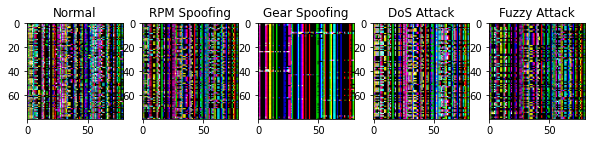

In [32]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('./train/0/240.png')
img2 = Image.open('./train/1/240.png')
img3 = Image.open('./train/2/240.png')
img4 = Image.open('./train/3/240.png')
img5 = Image.open('./train/4/240.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  # display it

## Split the training and test set 

In [33]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

2594


In [34]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [35]:
# The size of test set
Numbers

518

In [36]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [37]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [38]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [39]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing
